In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reference for the data refered to as hughes in this code:
#
# Hughes, T. P. et al. Spatial and temporal patterns of mass bleaching of
# corals in the Anthropocene. Science 359, 80–83 (2018).

# Read data from the Hughes supplemental material.  The first
# sheet is a cut-and-paste from their document with obvious typos
# fixed by hand and a few columns added for easier data manipulation.
# The second sheet has been arranged for easier import.
filename = 'references/Hughes100Reefs.xlsx' 
hughes = pd.read_excel(filename,header=0,sheet_name=1)
# Missing size values are set to zero - be careful how they are used later!
hughes.Size_km2 = hughes.Size_km2.replace({"-": "0"})

## Columns from Mumby et al. are
1. Hughes Reef - the index used in their data, 1-100.
2. Region - my code for their region labels.
    + AuA - Australasia
    + IO-ME - Indian Ocean/ Middle East
    + Pac - Pacific
    + WAtl - West Atlantic
3. Location - their location name for each reef. 
4. Numeric Lat - decimal values between about -35 and +35
5. Numeric Lon - decimal values between -180 and +180
6. Size_km2 - area in square kilometers, sometimes omitted.
7. Year - columns 7 to 43 - one column for each year of data, 1980 to 2016.  Values are blank, S, or M.
44. Severe count - the count of the number of cells in this row with the entry "S". values 0-7
45. Moderate count - the count of the number of cells in this row with the entry "M".  Values 0-12

In [2]:
# Now read our data for reef cell locations.
import scipy.io as sio

# Reference for all data for the 1,925 reef cell model.
# This has not been submitted to a journal yet, so all is subject to change:
#
# Logan, C. A., Dunne, J. P., Ryan, J. S., Baskett, M. L. & Donner, S. D. Can symbiont
# diversity and evolution allow corals to keep pace with global warming
# and ocean acidification? prep (2018).

# A copy of the data is in this repository.  The reference copy is in
# my Coral-Model-Data repository in the ProjectionsPaper directory.
mat_data = sio.loadmat('references/ESM2M_SSTR_JD.mat')
# Put just the lat/lon columns into a data frame.  Note that they are stored
# with longitude first in the incoming data.
cells = pd.DataFrame(mat_data['ESM2M_reefs_JD'], columns=['Lon', 'Lat'])
del mat_data  # hope this gets garbage collected - it's big




<IPython.core.display.Javascript object>


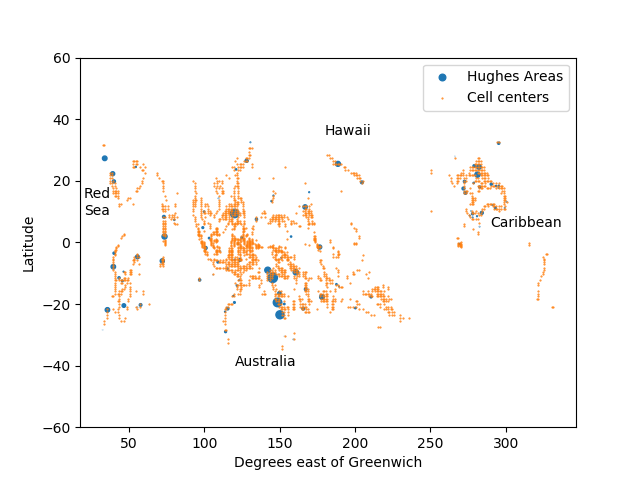

Text(180,35,'Hawaii')

In [3]:
plt.figure()
# Hughes reef areas can be large.  Make size proportional.  Conveniently, the marker
# size argument is in square units.  However, our map is in degree units and the areas
# are in kilometers.  This should be calculated carefully for map display, but for now
# just to a rough conversion.  The initial value relates to pixels per square degree.
conversion = 60*(1/111)**2

lon = hughes['Numeric Lon']
#plt.scatter(hughes['Numeric Lon'], hughes['Numeric Lat'], marker='o', s=conversion*hughes.Size_km2.astype(float))
plt.scatter(lon-180*(np.sign(lon)-1), hughes['Numeric Lat'], marker='o', s=conversion*hughes.Size_km2.astype(float), label='Hughes Areas')
# Mark our cells with small dots.
# scatter is broken so that the "," argument to plot pixels is ignored.
# use s=1 to make a very small dot.
lon = cells['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells['Lat'], marker='.', s=1, label='Cell centers')
plt.ylim([-60, 60])
plt.xlabel('Degrees east of Greenwich')
plt.ylabel('Latitude')
plt.legend()
plt.text(290, 5, 'Caribbean')
plt.text(120, -40, 'Australia')
plt.text(20, 9, 'Red\nSea')
plt.text(180, 35, 'Hawaii')

<IPython.core.display.Javascript object>


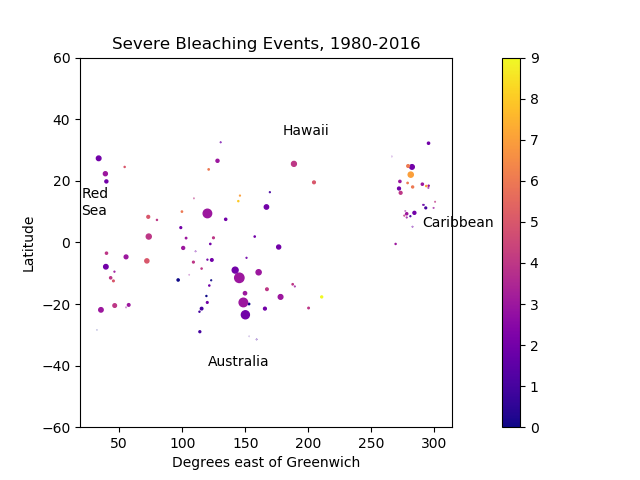

Text(180,35,'Hawaii')

In [4]:
# Now try an indication of bleaching severity.

plt.figure()
conversion = 60*(1/111)**2
lon = hughes['Numeric Lon']
severity = hughes['Severe count']
plt.scatter(lon-180*(np.sign(lon)-1), hughes['Numeric Lat'], marker='o', 
            s=conversion*hughes.Size_km2.astype(float),
            label='Hughes Areas',
            c=severity,
            cmap="plasma")

plt.ylim([-60, 60])
plt.xlabel('Degrees east of Greenwich')
plt.ylabel('Latitude')
plt.title('Severe Bleaching Events, 1980-2016')
plt.colorbar(pad=0.10)
plt.text(290, 5, 'Caribbean')
plt.text(120, -40, 'Australia')
plt.text(20, 9, 'Red\nSea')
plt.text(180, 35, 'Hawaii')

In [5]:
from mpl_toolkits.basemap import Basemap
# TBD: try a map, referencing https://matplotlib.org/basemap/api/basemap_api.html#module-mpl_toolkits.basemap
